In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

backgroud.jpg  huidu_target.jpg  pics
blend2.png     loag		 shuouhui_target.jpg
huidu.jpg      people		 成都信息工程大学.txt


In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
#!mkdir /home/aistudio/external-libraries
#!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

1.爬取母校的基本信息：（爬虫练习）
1.1 基本信息包含：创办时间、类别、属性、主管部门、学校官网、校徽、校训

In [5]:
import json
import re
import requests
import datetime
from bs4 import BeautifulSoup
import os
import pandas as pd

def crawl_wiki_data(school):
    """
    学校信息，返回html
    """
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
    }
    #school='成都信息工程大学'
    #school=str(input('输入你要参观的学校：\n'))
    url='https://baike.baidu.com/item/'+school
    #print(url)                       
    
    try:
        response = requests.get(url,headers=headers)
        #print(response.status_code)
        #print(response.text)

        #将一段文档传入BeautifulSoup的构造方法,就能得到一个文档的对象, 可以传入一段字符串
        soup = BeautifulSoup(response.text,'html.parser')
        
        #创办时间 time
        time=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.feature_poster > div > div.poster-left > div.poster-bottom > div > div:nth-child(1) > dl:nth-child(1) > dd')[0]
        time=list(time)
        #print(time[0])

        #类别 category
        category=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.feature_poster > div > div.poster-left > div.poster-bottom > div > div:nth-child(2) > dl:nth-child(1) > dd > a')[0]
        category=list(category)
        #print(category[0])

        #属性Attributes
        Attributes=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.feature_poster > div > div.poster-left > div.poster-bottom > div > div:nth-child(1) > dl:nth-child(2) > dd')[0]
        Attributes=list(Attributes)
        #print(Attributes[1].text)

        #主管部门department
        department=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.feature_poster > div > div.poster-left > div.poster-bottom > div > div:nth-child(1) > dl.bottomLine > dd')[0]
        department=list(department)
        #print(department[0])

        #学校官网school_url
        school_url=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.feature_poster > div > div.poster-left > div.poster-bottom > div > div:nth-child(2) > dl.bottomLine > dd > a')[0]
        school_url=list(school_url)
        #print(school_url)

        #学校loag
        loag=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.feature_poster > div > div.poster-right > div > a > img')
        loag=list(loag)
        #print(loag[0].get('src'))

        #校训 mott0
        motto=soup.select('body > div.body-wrapper.feature.feature_small.collegeSmall > div.content-wrapper > div > div.main-content > div.main_tab.main_tab-defaultTab.curTab > div.basic-info.cmn-clearfix > dl.basicInfo-block.basicInfo-right > dd:nth-child(6)')[0]
        motto=list(motto)
        #print(motto[0])       
      
        data={
            '创办时间':time[0],
            '类别':category[0],
            '属性':Attributes[1].text, 
            '主管部门':department[0],
            '学校官网':school_url, 
            '学校loag':loag[0].get('src'),
            '校训':motto[0], 
        }
        #index=['创办时间','类别','属性','主管部门','学习官网','学习loag','校训']
        #columns=['索引','列','信息']
        df = pd.DataFrame(data)
        df = df.replace('\n',' ',regex=True)
        df = df.stack().reset_index()
        #df = df.reset_index([df['level_1']])
        
        df.drop(['level_0'],axis=1,inplace=True)
        print(df)
        #df.columns=columns
        #df.index=index
        path='work/'+school+'.txt'
        df.to_csv(path,sep='\t')
        print('学校基本信息打印成功')
    except Exception as e:
        print(e)
    return loag[0].get('src')
    

In [6]:
#crawl_wiki_data('成都信息工程大学')

1.爬取母校的基本信息：（爬虫练习）
1.2下载母校的校徽

In [7]:
def down_loag(school,loag_url):
    '''
    根据图片链接列表pic_urls, 下载所有图片，保存在以name命名的文件夹中,
    '''
    path_loag = 'work/'+'loag/'


    if not os.path.exists(path_loag):
        os.makedirs(path_loag)

    try:
        loag = requests.get(loag_url, timeout=15)
        #print(pic.content)
        string = str(school) + '.jpg'
        with open(path_loag+string, 'wb') as f:
            f.write(loag.content)
            f.flush()
            f.close()
            print('成功下载-{}-的校徽'.format(school))
    except Exception as e:
        print(e)

In [10]:
#down_loag('成都信息工程大学','https://bkimg.cdn.bcebos.com/pic/838ba61ea8d3fd1fa2d25cd2354e251f94ca5f7b?x-bce-process=image/resize,m_lfit,w_268,limit_1/format,f_jpg')

1.爬取母校的基本信息：（爬虫练习）
1.3 下载母校的图片，默认只 下载 两张

In [8]:
def down_pics(school):
    num=0
    '''
    爬取每个学校的百度图片，并保存
    ''' 
    path_pic = 'work/'+'pics/'+school
    if not os.path.exists(path_pic):
        os.makedirs(path_pic)

    Re=[]
    link='http://image.baidu.com/search/index?tn=baiduimage&ps=1&ct=201326592&lm=-1&cl=2&nc=1&ie=utf-8&word='+school
    print(link)

    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36' 
     }

    response_pic = requests.get(url=link,headers=headers,timeout=7)
    result = response_pic.text
    pic_url = re.findall('"objURL":"(.*?)",', result, re.S)  # 先利用正则表达式找到图片url 
    print(len(pic_url))
 
    for each in pic_url:
        print('正在下载第' + str(num + 1) + '张图片，图片地址:' + str(each))
        try:
            if each is not None:
                pic = requests.get(each, timeout=7)
            else:
                continue
        except BaseException:
            print('错误，当前图片无法下载')
            continue
        else:
            string = str(num) + '.jpg'
            fp = open(path_pic+'/'+ string, 'wb')
            fp.write(pic.content)
            fp.close()
            num += 1

        # 默认下载2张学校图片 
        numPicture=2
        if num >= numPicture:
            return
    

In [9]:
#down_pics('成都信息工程大学')

2.生成背面的图

In [10]:
''''
学校与校徽的结合,背面结合
'''
from PIL import Image
def blend_two_images2(school):
    path_school='work/pics/'+school+'/'+'1.jpg'   #背面
    path_loag='work/loag/'+school+'.jpg'
    img1 = Image.open(path_school)
    img1 = img1.convert('RGBA')
    img2 = Image.open(path_loag)
    img2 = img2.convert('RGBA')
    r, g, b, alpha = img2.split()
    alpha = alpha.point(lambda i: i>0 and 204)
    img = Image.composite(img2, img1, alpha)
    img.show()
    img.save( "work/blend2.png")
    return None

In [11]:
blend_two_images2('成都信息工程大学')

3.人像抠图：
3.1模型加载

In [12]:
import paddlehub as hub

! hub install deeplabv3p_xception65_humanseg

humanseg = hub.Module(name="deeplabv3p_xception65_humanseg")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
2020-04-29 18:07:25,829-INFO: font search path ['/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf', '/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm', '/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
2020-04-29 18:07:26,217-INFO: generated new fontManager
[==================================================] 100.00%
Uncompress /home/aistudio/.paddlehub/tmp/tmpky9yqqtc/deeplabv3p_xception65_humanseg
[==================================================] 100.00%


[2020-04-29 18:07:36,991] [    INFO] - Installing deeplabv3p_xception65_humanseg module
[2020-04-29 18:07:37,010] [    INFO] - Module deeplabv3p_xception65_humanseg already installed in /home/aistudio/.paddlehub/modules/deeplabv3p_xception65_humanseg


3.人像抠图：
3.2抠图实现

In [13]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
def koutu():
    path = ['work/people/train.jpg']   # 需自己上传，路径要一致
    results = humanseg.segmentation(data={"image":path})
    # 预测结果展示
    print(results)
    for i in results:
        test_img_path = i['processed']

        img = mpimg.imread(test_img_path)

        # 展示预测结果图片
        plt.figure(figsize=(10,10))
        plt.imshow(img) 
        plt.axis('off') 
        plt.show()

In [14]:
from PIL import Image
import numpy as np
import cv2

def blend_images(fore_image, base_image, ratio, pos=None, align_bottom=True):
    """
    将抠出的人物图像换背景
    fore_image: 前景图片，抠出的人物图片
    base_image: 背景图片
    ratio: 调整前景的比例
    pos: 前景放在背景的位置的，格式为左上角坐标
    align_bottom: 默认使用底边对齐
    """
    
    bg_img = cv2.imread(base_image)  # read background image
    fg_img = cv2.imread(fore_image)  # read foreground image
    height_fg, width_fg, _ = fg_img.shape  # get height and width of foreground image
    height_bg, width_bg, _ = bg_img.shape  # get height and width of background image
    if ratio > (height_bg / height_fg): 
        print(f'ratio is too large, use maximum ratio {(height_bg / height_fg): .2}')
        ratio =round((height_bg / height_fg), 1)
    if ratio <  0.1:
        print('ratio < 0.1, use minimum ratio 0.1' )
        ratio  = 0.1
    # if no pos arg input, use this as default
    if not pos:
        pos = (height_bg - int(ratio*height_fg),  width_bg // 4)#底边对齐：hb-hf为纵坐标，//整除,背景图的1//4宽为横坐标
    elif align_bottom:
        pos = (height_bg - int(ratio*height_fg), pos[1])

    roi = bg_img[pos[0]: pos[0] + int(height_fg * ratio), pos[1] : pos[1]+int(width_fg*ratio)]#背景图片编辑
    cv2.imwrite("roi.jpg", roi)

    base_image = Image.open('roi.jpg').convert('RGB')
    fore_image = Image.open(fore_image).resize(base_image.size)
    # 图片加权合成
    scope_map = np.array(fore_image)[:,:,-1] / 255
    scope_map = scope_map[:,:,np.newaxis]
    scope_map = np.repeat(scope_map, repeats=3, axis=2)
    res_image = np.multiply(scope_map, np.array(fore_image)[:,:,:3]) + np.multiply((1-scope_map), np.array(base_image))
    
    bg_img[pos[0]: pos[0] + roi.shape[0], pos[1] : pos[1]+roi.shape[1]] = np.uint8(res_image)[:, : , ::-1]
    return bg_img

4.实现正面图的制作

In [15]:
# 展示合成图片 正面
def combination_pic(school):
    path='work/pics/'+school+'/0.jpg'
    plt.figure(figsize=(10,10))
    img  = blend_images('humanseg_output/train.png', path, 1.5,pos=(100,1000))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img) 
    plt.axis('off') 
    plt.show()

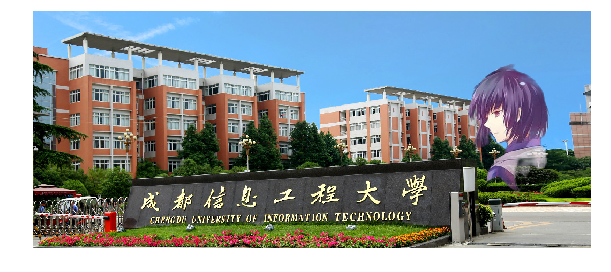

In [16]:
combination_pic('成都信息工程大学')

4.图像手绘效果
4.1 实现灰度图
4.2 实现手绘图

In [17]:
#导入图片并进行灰度处理
from PIL import Image
import numpy as np
def shouhui_pic():

    img = Image.open('work/blend2.png')  #读取图片
    img_huidu = img.convert('L')   #灰度处理
    img_huidu.save('work/huidu.jpg')
    print('灰度化处理图片成功')
    img_arr = np.asarray(img_huidu, dtype='float')   #转换为数组表示
    #1.提取x和y方向的梯度值
    grad_x, grad_y = np.gradient(img_arr) 
    #重构梯度
    depth = 100                          #预设深度值为10，深度的范围为0~100,可尝试调整
    grad_x_new = grad_x*depth/100.           #根据预设深度调整x，y方向梯度值
    grad_y_new = grad_y*depth/100. 
    vec_el = np.pi/2.2   #光源的俯视角度，弧度值,可调
    vec_az = np.pi/4.    #光源的方位角度，弧度值,可调

    #dx,dy,dz ：光源对x,y,z三方向的影响程度
    dx = np.cos(vec_el)*np.cos(vec_az)     #光源对x 轴的影响
    dy = np.cos(vec_el)*np.sin(vec_az)     #光源对y 轴的影响
    dz = np.sin(vec_el)                    #光源对z 轴的影响
    #构造x和y轴梯度的三维归一化单位坐标系
    A = np.sqrt(grad_x**2 + grad_y**2 + 1.)  
    #梯度与光源相互作用
    uni_x = grad_x/A
    uni_y = grad_y/A
    uni_z = 1./A         #grad_z=1
    #光源归一化
    ea= 255*(dx*uni_x + dy*uni_y + dz*uni_z)
    #为避免数据溢出，将生成的灰度值裁剪至0-255区间。
    ea = ea.clip(0,255)
    img_shouhui = Image.fromarray(ea.astype('uint8'))    
    img_shouhui .save("work/backgroud.jpg")
    print('手绘图片成功')
    

In [25]:
shouhui_pic()

灰度化处理图片成功
手绘图片成功


5.添加文字

In [19]:
# Linux系统默认字体文件路径
# !ls /usr/share/fonts/
# 查看系统可用的ttf格式中文字体
!fc-list :lang=zh | grep ".ttf"

In [20]:
!wget https://mydueros.cdn.bcebos.com/font/simhei.ttf # 下载中文字体
# #创建字体目录fonts
!mkdir .fonts
# # 复制字体文件到该路径
!cp simhei.ttf .fonts/

--2020-04-29 18:08:04--  https://mydueros.cdn.bcebos.com/font/simhei.ttf
Resolving mydueros.cdn.bcebos.com (mydueros.cdn.bcebos.com)... 182.61.128.198
Connecting to mydueros.cdn.bcebos.com (mydueros.cdn.bcebos.com)|182.61.128.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9753388 (9.3M) [application/octet-stream]
Saving to: ‘simhei.ttf.1’

simhei.ttf.1        100%[===================>]   9.30M  59.9MB/s    in 0.2s    

2020-04-29 18:08:04 (59.9 MB/s) - ‘simhei.ttf.1’ saved [9753388/9753388]



In [21]:
pip install PIL

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
  ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Note: you may need to restart the kernel to use updated packages.


5.添加文字
5.1 灰度图中添加文字，学校创办时间、校训、前程似锦

In [26]:
import PIL
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import pandas as pd
def add_text_huidu(school):
    #设置所使用的字体
    font1 = ImageFont.truetype("simhei.ttf", 40)
    font = ImageFont.truetype("simhei.ttf", 30)
    path='work/'+school+'.txt'
    data=pd.read_csv(path,sep='\t',header=0)
    #print(data.columns)
    #print(data.index)

    time=str(data['0'][0])
    motto=str(data['0'][6])
    print(time,motto)
    #打开图片
    imageFile = "work/huidu.jpg"
    im1 = Image.open(imageFile)
    
    #画图
    draw = ImageDraw.Draw(im1)
    # 校训
    draw.text(xy=(200,10),text=motto,color='gold',font=font1,)    #设置文字位置/内容/颜色/字体
    #创办时间
    draw.text(xy=(300,100),text=time,font=font,)    #设置文字位置/内容/颜色/字体
    #前程似锦
    draw.text(xy=(10,220),text='前程似锦',color='gold',font=font1,)    #设置文字位置/内容/颜色/字体
    # 展示结果图片
    plt.figure(figsize=(10,10))
    plt.imshow(im1) 
    plt.axis('off') 
    plt.show()
    #另存图片
    im1.save("work/huidu_target.jpg")

 1951年1月   成于大气 信达天下 


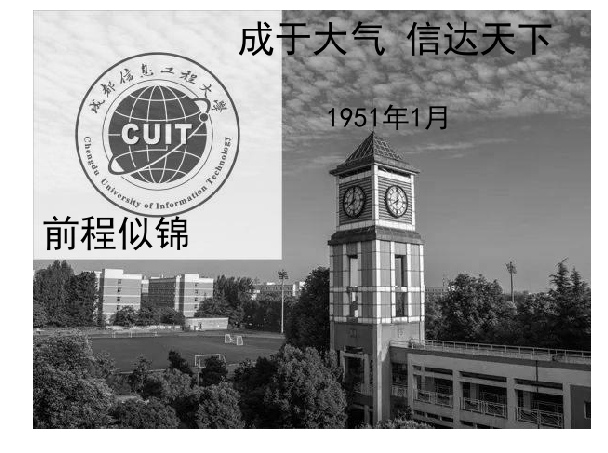

In [27]:
add_text_huidu('成都信息工程大学')

In [28]:
def add_text_shouhui(school):
    #设置所使用的字体
    font1 = ImageFont.truetype("simhei.ttf", 40)
    font = ImageFont.truetype("simhei.ttf", 30)
    path='work/'+school+'.txt'
    data=pd.read_csv(path,sep='\t',header=0)
    #print(data.columns)
    #print(data.index)

    time=str(data['0'][0])
    motto=str(data['0'][6])
    print(time,motto)
    #打开图片
    imageFile = "work/backgroud.jpg"
    im1 = Image.open(imageFile)
    
    #画图
    draw = ImageDraw.Draw(im1)
    # 校训
    draw.text(xy=(200,10),text=motto,color='gold',font=font1,)    #设置文字位置/内容/颜色/字体
    #创办时间
    draw.text(xy=(300,100),text=time,font=font,)    #设置文字位置/内容/颜色/字体
    #前程似锦
    draw.text(xy=(10,220),text='前程似锦',color='gold',font=font1,)    #设置文字位置/内容/颜色/字体
    # 展示结果图片
    plt.figure(figsize=(10,10))
    plt.imshow(im1) 
    plt.axis('off') 
    plt.show()
    #另存图片
    im1.save("work/shuouhui_target.jpg")

 1951年1月   成于大气 信达天下 


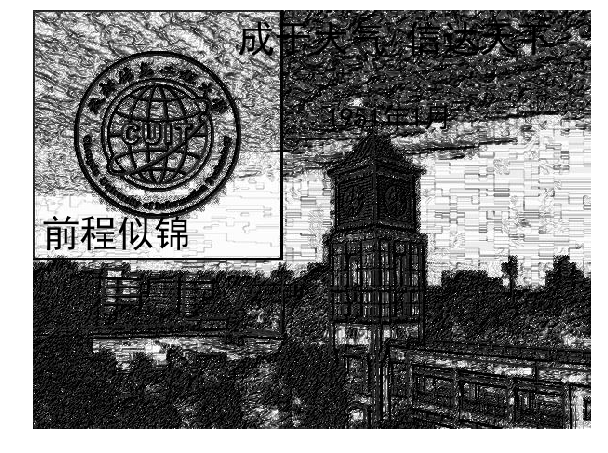

In [29]:
add_text_shouhui('成都信息工程大学')

输入你要参观的学校：
  level_1                                                  0
0    创办时间                                           1951年1月 
1      类别                                               公立大学
2      属性                                             省部共建大学
3    主管部门                                               四川省 
4    学校官网                             http://www.cuit.edu.cn
5  学校loag  https://bkimg.cdn.bcebos.com/pic/838ba61ea8d3f...
6      校训                                         成于大气 信达天下 
学校基本信息打印成功
成功下载-成都信息工程大学-的校徽
http://image.baidu.com/search/index?tn=baiduimage&ps=1&ct=201326592&lm=-1&cl=2&nc=1&ie=utf-8&word=成都信息工程大学
30
正在下载第1张图片，图片地址:http://g.hiphotos.baidu.com/zhidao/pic/item/5882b2b7d0a20cf4474a38f07e094b36adaf99c3.jpg
正在下载第2张图片，图片地址:http://5b0988e595225.cdn.sohucs.com/q_70,c_zoom,w_640/images/20181026/b17c42a74b9d49cb9389e9a70c68a3ad.jpeg


[2020-04-29 18:12:54,972] [    INFO] - 0 pretrained paramaters loaded by PaddleHub


[{'origin': 'work/people/train.jpg', 'processed': 'humanseg_output/train.png'}]


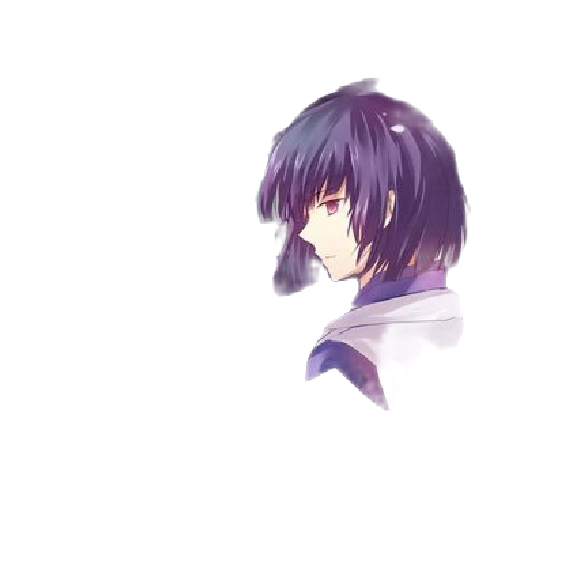

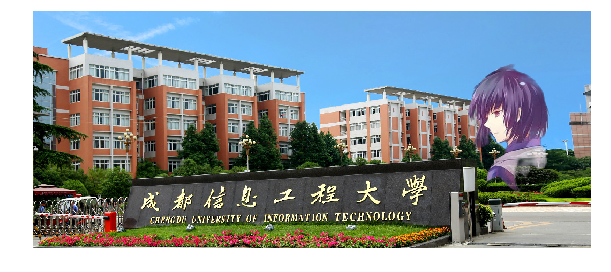

灰度化处理图片成功
手绘图片成功
 1951年1月   成于大气 信达天下 


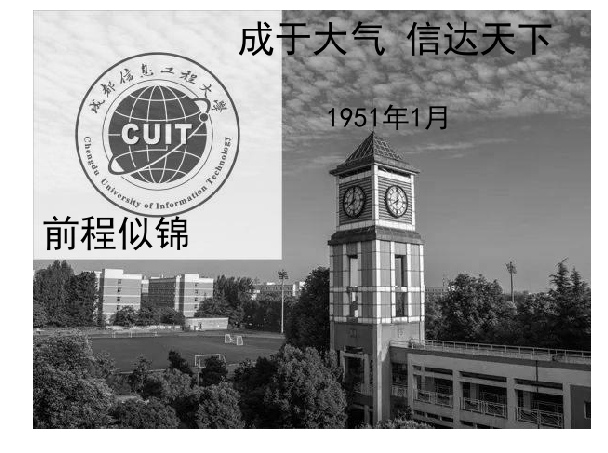

 1951年1月   成于大气 信达天下 


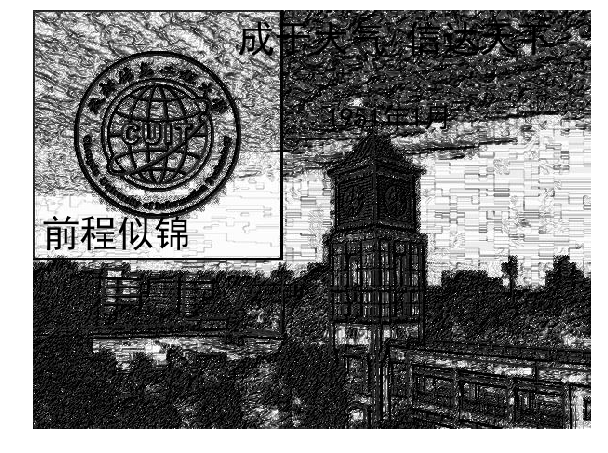

In [30]:
if __name__ == "__main__":
    school=str(input('输入你要参观的学校：\n'))

    loag_url=crawl_wiki_data(school)
    down_loag(school,loag_url)
    down_pics(school)
    #与校徽进行结合
    blend_two_images2(school)
    #抠图
    koutu()
    #与人物图像结合
    combination_pic(school)
    #手绘图像
    shouhui_pic()
    #背景添加文字
    add_text_huidu(school)
    add_text_shouhui(school)